Ridge Regression from scratch

In [219]:
import matplotlib.pyplot as plt
import statistics
import numpy as np

In [220]:
y_actual=np.array([10,12,22,12,20,21,23,26,34,49])
X=np.array([3,4,6,4,5,12,8,7,9,10])

In [234]:
def RidgeRegression(x,y_actual):
    m,c=0,0
    num,deno=0,0
    l=0.1
    x_mean=statistics.mean(x)
    y_mean=statistics.mean(y_actual)
    num=sum(x*y_actual)-y_mean*sum(x)
    deno=sum(x**2)-x_mean*sum(x)+l
    m=num/deno
    c=(y_mean-m*x_mean)
    return m,c  

In [235]:
m,c=RidgeRegression(X,y_actual)
print(m,c)


2.089326267978804 9.464042392127176


0.45276592868525023


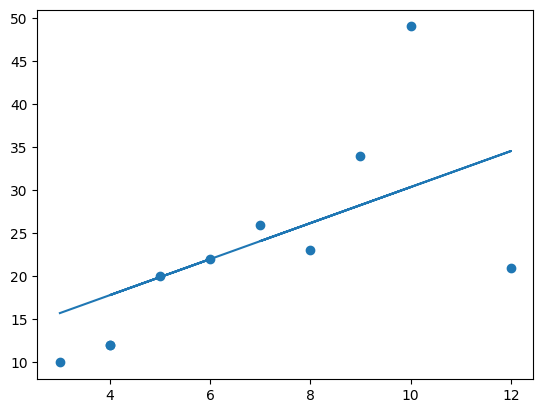

In [236]:
y_pred=X*m+c
rss=sum((y_pred-y_actual)**2)
tss=sum((y_actual-statistics.mean(y_actual))**2)
r2=1-(rss/tss)
print(r2)
plt.plot(X,y_pred)
plt.scatter(X,y_actual)
plt.show()

Ridge Regression using gradient descent

In [224]:
def RidgeRegGD(X,y_actual):
    deri_m=0
    deri_c=0
    m,c=0,0
    epoch=400
    weight=[]
    cost=[]
    l=0.1
    L=0.018

    for i in range(epoch):
        y_pred=m*X+c
        deri_m=sum(X*(y_actual-y_pred))+(l*m)
        deri_c=sum(y_actual-y_pred)
        deri_m=(-2/len(X))*(deri_m)
        deri_c=(-2/len(X))*(deri_c)
        m=m-L*deri_m
        c=c-L*deri_c
        cost.append(sum((y_actual-y_pred)**2)/len(X))
        weight.append(m)

    print(cost,weight)
    plt.scatter(weight,cost)
    plt.show()
    # plt.scatter(X,y_actual)
    # plt.plot(X,y_pred)
    # plt.show()
    return m,c

[647.5, 618.642607648, 590.4412171369383, 564.4284959919481, 538.9697974190616, 515.5221118249, 492.53839788199247, 471.4035572991505, 450.65329729933626, 431.6038649766436, 412.86914296901597, 395.7000084131429, 378.7842121451401, 363.31040153728856, 348.0361376968509, 334.09083893888317, 320.29805251499863, 307.73083387197346, 295.27511164293867, 283.9503150099103, 272.70135512674005, 262.4966468066408, 252.3368782053535, 243.14194176161482, 233.96527873137956, 225.68063599147595, 217.39135466281095, 209.92730231327204, 202.43902712689027, 195.714677570986, 188.9494669573071, 182.89188321670952, 176.77940477092065, 171.32282021396696, 165.79960660306148, 160.8847211854666, 155.89349888201198, 151.46684440059434, 146.95592811223918, 142.96929570711924, 138.89204206926007, 135.30196587287733, 131.61628060190816, 128.3835720311428, 125.05146530400137, 122.14079303103111, 119.12797836938061, 116.50748949341023, 113.78302189321258, 111.42400027404332, 108.95994973839777, 106.8365078486385

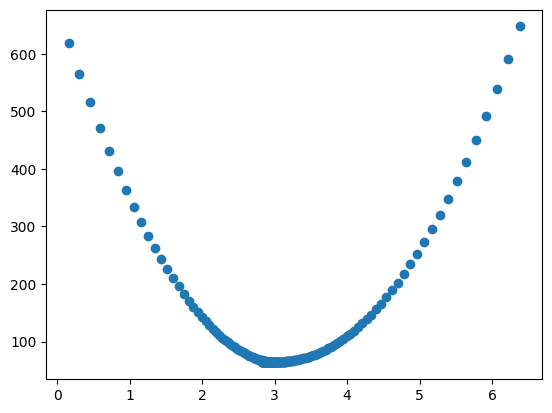

2.8313618672403527 3.5790191619323104
0.4861325748075219


In [225]:
m,c=RidgeRegGD(X,y_actual)
print(m,c)
# 63.778816782460694
y_pred=m*X+c
rss=sum((y_pred-y_actual)**2)
tss=sum((y_actual-statistics.mean(y_actual))**2)
r2=1-(rss/tss)
print(r2)


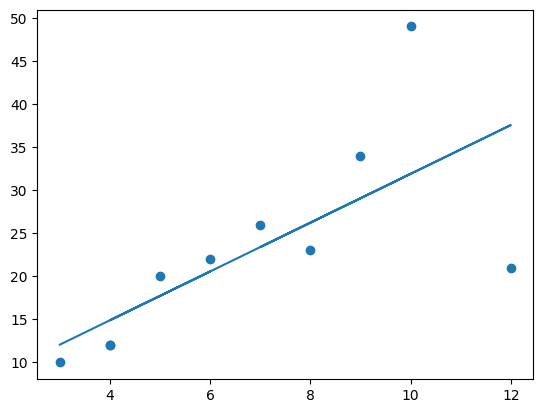

In [226]:
y_pred=X*m+c
plt.plot(X,y_pred)
plt.scatter(X,y_actual)
plt.show()

In [227]:
y_pred=X*m+c
rss=sum((y_pred-y_actual)**2)
tss=sum((y_actual-statistics.mean(y_actual))**2)
r2=1-(rss/tss)
r2

0.4861325748075219

Ridge Regression using Sklearn

In [228]:
from sklearn.linear_model import Ridge
y_actual=np.array([10,12,22,12,20,21,23,26,34,49])
x=np.array([3,4,6,4,5,12,8,7,9,10])

In [229]:
x_modi=x.reshape(-1, 1)
regr = Ridge()
regr.fit(x_modi, y_actual)
inter=regr.intercept_
slope=regr.coef_

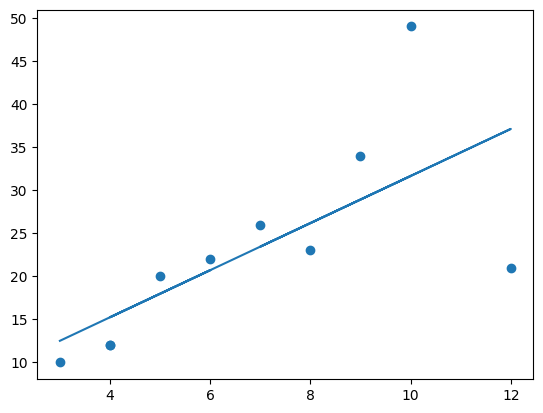

48.6343031779126 [2.73282443] 4.31679389312977


In [230]:
rss,tss=0,0
y_pred=(slope*x+inter)
plt.figure()
plt.scatter(x,y_actual)
plt.plot(x,y_pred)
plt.show()
rss=sum((y_pred-y_actual)**2)
tss=sum((y_actual-statistics.mean(y_actual))**2)
r2=1-(rss/tss)
print(r2*100,slope,inter)